In [18]:
import pandas as pd

df = pd.read_csv("../data/data_without_price_outliers.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zipcode               4735 non-null   int64  
 1   streetAddress         4735 non-null   object 
 2   homeType              4735 non-null   object 
 3   yearBuilt             4735 non-null   int64  
 4   lotAreaValue          4735 non-null   float64
 5   livingAreaValue       4735 non-null   float64
 6   bedrooms              4735 non-null   int64  
 7   bathrooms             4735 non-null   float64
 8   stories               4735 non-null   float64
 9   flooring              4735 non-null   object 
 10  heating               4735 non-null   object 
 11  cooling               4735 non-null   object 
 12  fireplaceFeatures     4735 non-null   int64  
 13  taxAssessedValue      4735 non-null   float64
 14  zestimate             4735 non-null   float64
 15  rentZestimate        

In [19]:
df.head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue,log_price,log_taxAssessedValue
0,90210,10100 Angelo Cir,SINGLE_FAMILY,2009,1041.815612,596.901775,5,7.0,1.0,['Tile'],...,1,1,1,0,0,1,3.017791,2.775903,4.556303,6.839742
1,90044,948 W 61st St,MULTI_FAMILY,2008,483.281406,78.410132,2,1.0,1.0,[],...,0,0,0,0,0,0,2.684200,1.894372,4.648360,5.958711
2,91352,10159 Colwell Dr,SINGLE_FAMILY,1943,535.957407,107.210062,3,1.0,1.0,"['Carpet', 'Vinyl', 'Wood']",...,0,1,0,0,0,1,2.729130,2.030236,5.093422,5.856789
3,91605,8250 Lankershim Blvd,MANUFACTURED,1990,111.483600,69.677250,2,2.0,1.0,['Laminate'],...,1,1,0,0,1,1,2.047211,1.843091,5.130334,4.251881
4,91304,8811 Canoga Ave SPACE 535,MANUFACTURED,1971,82058.180220,124.861632,2,2.0,1.0,[],...,1,1,0,0,0,1,4.914122,2.096429,4.929419,5.641439


In [20]:
df = df.drop(columns=['streetAddress', 'cooling', 'heating', 'flooring', 'sold-history','zestimate'])


In [21]:
df = df.rename(columns={'fireplaceFeatures': 'hasFireplace'})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zipcode               4735 non-null   int64  
 1   homeType              4735 non-null   object 
 2   yearBuilt             4735 non-null   int64  
 3   lotAreaValue          4735 non-null   float64
 4   livingAreaValue       4735 non-null   float64
 5   bedrooms              4735 non-null   int64  
 6   bathrooms             4735 non-null   float64
 7   stories               4735 non-null   float64
 8   hasFireplace          4735 non-null   int64  
 9   taxAssessedValue      4735 non-null   float64
 10  rentZestimate         4735 non-null   float64
 11  price                 4735 non-null   int64  
 12  parkingCapacity       4735 non-null   int64  
 13  hasCooling            4735 non-null   int64  
 14  hasHeating            4735 non-null   int64  
 15  hasFireplace         

In [23]:
df['homeType'].value_counts()

homeType
SINGLE_FAMILY    3133
CONDO             890
MULTI_FAMILY      396
TOWNHOUSE         293
APARTMENT          11
MANUFACTURED       10
LOT                 2
Name: count, dtype: int64

In [24]:
homeType_map = {
    'SINGLE_FAMILY': 0,
    'CONDO': 1,
    'TOWNHOUSE': 2,
    'MULTI_FAMILY': 3,
    'MANUFACTURED': 4,
    'APARTMENT': 5,
    'LOT' : 6
}

df['homeType'] = df['homeType'].map(homeType_map)

In [25]:
df['homeType'].value_counts()

homeType
0    3133
1     890
3     396
2     293
5      11
4      10
6       2
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled_array, columns=df.columns)
df_scaled.head()

,zipcode,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,hasFireplace,taxAssessedValue,...,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue,log_price,log_taxAssessedValue
0,-0.706595,-0.599546,1.608411,-0.262601,3.262862,0.755168,2.110893,-0.543363,-1.093242,5.672993,...,0.490742,0.359532,0.882840,-0.351239,-0.360654,0.429006,-0.029991,2.525575,-5.445137,2.617522
1,-0.962604,2.473912,1.574550,-0.342745,-0.863576,-0.641961,-0.911393,-0.543363,-1.093242,0.114918,...,-2.037729,-2.781396,-1.132708,-0.351239,-0.360654,-2.330971,-0.709961,-1.383036,-5.108745,0.626412
2,1.054626,-0.599546,-0.626429,-0.335186,-0.634371,-0.176252,-0.911393,-0.543363,-1.093242,-0.061138,...,-2.037729,0.359532,-1.132708,-0.351239,-0.360654,0.429006,-0.618379,-0.780633,-3.482421,0.396070
3,1.444808,3.498398,0.965048,-0.396093,-0.933077,-0.641961,-0.407679,-0.543363,-1.093242,-0.710200,...,0.490742,0.359532,-1.132708,-0.351239,2.772738,0.429006,-2.008360,-1.610411,-3.347539,-3.230989
4,0.980599,3.498398,0.321685,11.362299,-0.493890,-0.641961,-0.407679,-0.543363,-1.093242,-0.321354,...,0.490742,0.359532,-1.132708,-0.351239,-0.360654,0.429006,3.835372,-0.487138,-4.081712,-0.090617


In [27]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zipcode               4735 non-null   float64
 1   homeType              4735 non-null   float64
 2   yearBuilt             4735 non-null   float64
 3   lotAreaValue          4735 non-null   float64
 4   livingAreaValue       4735 non-null   float64
 5   bedrooms              4735 non-null   float64
 6   bathrooms             4735 non-null   float64
 7   stories               4735 non-null   float64
 8   hasFireplace          4735 non-null   float64
 9   taxAssessedValue      4735 non-null   float64
 10  rentZestimate         4735 non-null   float64
 11  price                 4735 non-null   float64
 12  parkingCapacity       4735 non-null   float64
 13  hasCooling            4735 non-null   float64
 14  hasHeating            4735 non-null   float64
 15  hasFireplace         

**PCA**

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_CEV_for_pca(X):
    max_components = min(X.shape)
    explained_variances = []
    for n in range(1, max_components + 1):
        pca = PCA(n_components=n)
        X_pca = pca.fit_transform(X)
        cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
        explained_variances.append(cumulative_explained_variance[-1])
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_components + 1), explained_variances, marker='o', linestyle='--')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance for Different Numbers of Principal Components')
    plt.axhline(y=0.95, color='b', linestyle='--')
    plt.axhline(y=0.9, color='g', linestyle='--')
    plt.axhline(y=1.0, color='r', linestyle='--')
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xticks(np.arange(0, max_components + 1, 1))
    plt.show()


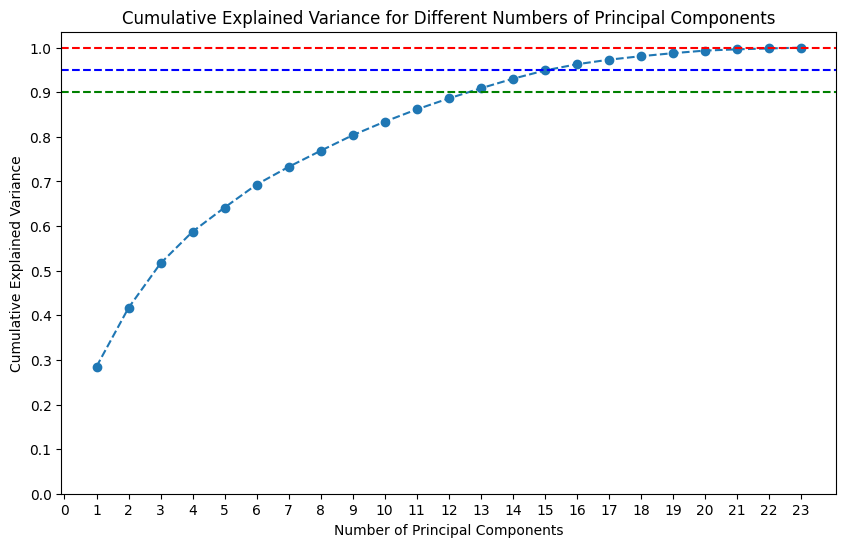

In [29]:
plot_CEV_for_pca(df_scaled.values)

In [30]:
df_95 = PCA(n_components=0.95).fit_transform(df_scaled)
df_95 = pd.DataFrame(df_95, columns=[f'PC{i}' for i in range(1, df_95.shape[1] + 1)])

In [31]:
df_95.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     4735 non-null   float64
 1   PC2     4735 non-null   float64
 2   PC3     4735 non-null   float64
 3   PC4     4735 non-null   float64
 4   PC5     4735 non-null   float64
 5   PC6     4735 non-null   float64
 6   PC7     4735 non-null   float64
 7   PC8     4735 non-null   float64
 8   PC9     4735 non-null   float64
 9   PC10    4735 non-null   float64
 10  PC11    4735 non-null   float64
 11  PC12    4735 non-null   float64
 12  PC13    4735 non-null   float64
 13  PC14    4735 non-null   float64
 14  PC15    4735 non-null   float64
 15  PC16    4735 non-null   float64
dtypes: float64(16)
memory usage: 592.0 KB


In [32]:
df_95_2 = PCA(n_components=0.95).fit_transform(df_scaled.drop(columns=['price', 'log_taxAssessedValue', 'log_price', 'taxAssessedValue']))
df_95_2 = pd.DataFrame(df_95_2, columns=[f'PC{i}' for i in range(1, df_95_2.shape[1] + 1)])

In [33]:
df_scaled.to_csv("../data/scaled_data.csv", index=False)
df.to_csv("../data/not_scaled_data.csv", index=False)
df_95.to_csv("../data/pca_data.csv", index=False)
df_95_2.to_csv("../data/pca_data_linear.csv", index=False)